# СОЗДАНИЕ МОДЕЛЕЙ 

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Activation, Dropout
from keras.models import load_model

%matplotlib inline

In [2]:
# загрузка и просмотр датасета
df = pd.read_excel('../data/processed/df_clean.xlsx', index_col=0)
df

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
5,2.767918,2000.000000,748.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,60.000000
6,2.569620,1910.000000,807.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074


# Модуль упругости при растяжении и Прочность при растяжении

In [3]:
# хранение оценок моделей
MAE_Emod=[] # средняя абсолютная ошибка - Модуль упругости при растяжении
MSE_Emod=[] # среднеквадратическая ошибка - Модуль упругости при растяжении
R2_Emod=[] # коэффициент детерминации - Модуль упругости при растяжении

MAE_Rm=[] # средняя абсолютная ошибка - Прочность при растяжении
MSE_Rm=[] # среднеквадратическая ошибка - Прочность при растяжении
R2_Rm=[] # коэффициент детерминации - Прочность при растяжении

In [4]:
# выделение целевых переменных
y = df[['Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа']]
y_Emod = df[['Модуль упругости при растяжении, ГПа']]
y_Rm = df[['Прочность при растяжении, МПа']]
y.head()

,"Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа"
1,70.0,3000.0
3,70.0,3000.0
4,70.0,3000.0
5,70.0,3000.0
6,70.0,3000.0


In [5]:
X = df.drop(['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'], axis=1)
X.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,220.0,0,4.0,60.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,220.0,0,5.0,57.0
5,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,220.0,0,5.0,60.0
6,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,220.0,0,5.0,70.0


In [6]:
# разбиение данных на тренировочную и тестовую части
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, shuffle=True)

In [7]:
# нормализация  данных
scaler_norm = MinMaxScaler()
scaler_norm.fit(X)
X_norm = pd.DataFrame (data =scaler_norm.transform(X), columns=X.columns)
scaler_norm_y = MinMaxScaler()
scaler_norm_y.fit(y)
y_norm = pd.DataFrame (data = scaler_norm_y.transform(y), columns=y.columns)

In [8]:
# разбиение нормализованных данных на тестовую и тренировочную часть
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, 
                                                                        test_size=0.3, random_state=42, shuffle=True)

In [9]:
print(X_train_norm.shape)
print(X_test_norm.shape)
print(y_train_norm.shape)
print(y_test_norm.shape)

(645, 11)
(277, 11)
(645, 2)
(277, 2)


Linear Regression

In [10]:
modelLinear = LinearRegression()
modelLinear.fit(X_train_norm,y_train_norm)
y_pred =  scaler_norm_y.inverse_transform (modelLinear.predict(X_test_norm))
MAE_Linear_Emod = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAE_Linear_Rm = mean_squared_error(y_test.iloc[:,1],y_pred[:,1])
MSE_Linear_Emod = mean_squared_error(y_test.iloc[:,0],y_pred[:,0])
MSE_Linear_Rm = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2_Linear_Emod = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2_Linear_Rm = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAE_Linear_Emod)
print (MAE_Linear_Rm)
print (MSE_Linear_Emod)
print (MSE_Linear_Rm)
print (R2_Linear_Emod)
print (R2_Linear_Rm)

2.6109355505901184
372.05238450611114
-0.024476898005094228
-0.003529768950333745


In [11]:
# записываем данные об ошибках в итоговую таблицу
MAE_Emod.append(['Linear',MAE_Linear_Emod])
MAE_Rm.append(['Linear',MAE_Linear_Rm])
MSE_Emod.append(['Linear',MSE_Linear_Emod])
MSE_Rm.append(['Linear',MSE_Linear_Rm])
R2_Emod.append(['Linear',R2_Linear_Emod])
R2_Rm.append(['Linear',R2_Linear_Rm])

Ridge regression

In [12]:
# Гиперпараметры для поиска по сетке
params = [{'alpha': [20, 10, 1, 0.1, 0.01, 0.0001],
           "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}]

In [13]:
# Поиск по сетке с перекрестной проверкой
modelRidge = Ridge()
cv_scheme = KFold(n_splits=10, shuffle=True, random_state=1)
cv = GridSearchCV(estimator=modelRidge, param_grid=params,
                  scoring='neg_root_mean_squared_error', cv=cv_scheme, return_train_score=True, n_jobs=-1)
cv.fit(X_train_norm,y_train_norm)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid=[{'alpha': [20, 10, 1, 0.1, 0.01, 0.0001],
                          'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                     'sag', 'saga']}],
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [14]:
print("Лучший параметр для гребневой регрессии:")
print(cv.best_params_)
print("Лучший средний балл перекрестной проверки:")
print(cv.best_score_)

Лучший параметр для гребневой регрессии:
{'alpha': 20, 'solver': 'saga'}
Лучший средний балл перекрестной проверки:
-0.18973637716633557


In [15]:
# Модель линейной регрессии Ridge
alpha = cv.best_params_['alpha']
solver = cv.best_params_['solver']

modelRidge = Ridge(alpha=alpha, solver=solver)
modelRidge.fit(X_train_norm,y_train_norm)
y_pred =  scaler_norm_y.inverse_transform (modelRidge.predict(X_test_norm))
MAE_Ridge_Emod = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAE_Ridge_Rm = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2_Ridge_Emod = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2_Ridge_Rm = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAE_Ridge_Emod)
print (MAE_Ridge_Rm)
print (R2_Ridge_Emod)
print (R2_Ridge_Rm)

2.5998224772212875
369.88575849459477
-0.017619777856030527
0.00041319486233071245


In [16]:
# записываем данные об ошибках в итоговую таблицу
MAE_Emod.append(['Ridge',MAE_Ridge_Emod])
MAE_Rm.append(['Ridge',MAE_Ridge_Rm])


R2_Emod.append(['Ridge',R2_Ridge_Emod])
R2_Rm.append(['Ridge',R2_Ridge_Rm])

Lasso regression

In [17]:
# модель линейной регрессии Lasso
modelLasso = Lasso(alpha=0.001)
modelLasso.fit(X_train_norm,y_train_norm)
y_pred = scaler_norm_y.inverse_transform (modelLasso.predict(X_test_norm))
MAE_Lasso_Emod = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAE_Lasso_Rm = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2_Lasso_Emod = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2_Lasso_Rm = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAE_Lasso_Emod)
print (MAE_Lasso_Rm)
print (R2_Lasso_Emod)
print (R2_Lasso_Rm)

2.5948108078737024
368.9355592328838
-0.018703787461314736
0.0033815533408245724


In [18]:
# записываем данные об ошибках в итоговую таблицу
MAE_Emod.append(['Lasso',MAE_Lasso_Emod])
MAE_Rm.append(['Lasso',MAE_Lasso_Rm])
R2_Emod.append(['Lasso',R2_Lasso_Emod])
R2_Rm.append(['Lasso',R2_Lasso_Rm])

ElasticNet regression

In [19]:
# модель линейной регрессии ElasticNet
modelElastic = ElasticNet(alpha=0.5, l1_ratio=0.5)
modelElastic.fit(X_train_norm,y_train_norm)
y_pred = scaler_norm_y.inverse_transform (modelElastic.predict(X_test_norm))
MAE_Elastic_Emod = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAE_Elastic_Rm = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2_Elastic_Emod = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2_Elastic_Rm = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAE_Elastic_Emod)
print (MAE_Elastic_Rm)
print (R2_Elastic_Emod)
print (R2_Elastic_Rm)

2.5801929025662833
368.8669394882762
-0.00887867080603466
-5.703200261408803e-05


In [20]:
# записываем данные об ошибках в итоговую таблицу
MAE_Emod.append(['ElasticNet',MAE_Elastic_Emod])
MAE_Rm.append(['ElasticNet',MAE_Elastic_Rm])
R2_Emod.append(['ElasticNet',R2_Elastic_Emod])
R2_Rm.append(['ElasticNet',R2_Elastic_Rm])

GradientBoostingRegressor

In [21]:
# модель регрессии GradientBoostingRegressor
modelGBR_Emod = GradientBoostingRegressor()
modelGBR_Emod.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred_Emod = modelGBR_Emod.predict(X_test_norm)
modelGBR_Rm = GradientBoostingRegressor()
modelGBR_Rm.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred_Rm = modelGBR_Rm.predict(X_test_norm)
y_pred = np.vstack((y_pred_Emod,y_pred_Rm)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAE_GBR_Emod = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAE_GBR_Rm = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2_GBR_Emod = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2_GBR_Rm = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAE_GBR_Emod)
print (MAE_GBR_Rm)
print (R2_GBR_Emod)
print (R2_GBR_Rm)

2.7049039964607657
382.88631067523124
-0.12545856440352332
-0.054775033603555956


In [22]:
# записываем данные об ошибках в итоговую таблицу
MAE_Emod.append(['GradientBoosting',MAE_GBR_Emod])
MAE_Rm.append(['GradientBoosting',MAE_Elastic_Rm])
R2_Emod.append(['GradientBoosting',R2_GBR_Emod])
R2_Rm.append(['GradientBoosting',R2_GBR_Rm])

KNeighborsRegressor

In [23]:
modelNeihgbor_Emod = KNeighborsRegressor(n_neighbors=13)
modelNeihgbor_Emod.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred_Emod = modelNeihgbor_Emod.predict(X_test_norm)
modelNeihgbor_Rm = KNeighborsRegressor()
modelNeihgbor_Rm.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred_Rm = modelNeihgbor_Rm.predict(X_test_norm)
y_pred = np.vstack((y_pred_Emod,y_pred_Rm)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAE_Neihgbor_Emod = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAE_Neihgbor_Rm = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2_Neihgbor_Emod = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2_Neihgbor_Rm = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAE_Neihgbor_Emod)
print (MAE_Neihgbor_Rm)
print (R2_Neihgbor_Emod)
print (R2_Neihgbor_Rm)

2.6225621597024773
400.581653879789
-0.04185458098976058
-0.1709249661618053


In [24]:
# записываем данные об ошибках в итоговую таблицу
MAE_Emod.append(['KNeighbors',MAE_Neihgbor_Emod])
MAE_Rm.append(['KNeighbors',MAE_Neihgbor_Rm])
R2_Emod.append(['KNeighbors',R2_Neihgbor_Emod])
R2_Rm.append(['KNeighbors',R2_Neihgbor_Rm])

DecisionTreeRegressor

In [25]:
# модель регрессии DecisionTreeRegressor
modelTree_Emod = DecisionTreeRegressor(max_depth=3)
modelTree_Emod.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred_Emod = modelTree_Emod.predict(X_test_norm)

modelTree_Rm = DecisionTreeRegressor(max_depth=5)
modelTree_Rm.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred2 = modelTree_Rm.predict(X_test_norm)

y_pred = np.vstack((y_pred_Emod,y_pred_Rm)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAE_Tree_Emod = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAE_Tree_Rm = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2_Tree_Emod = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2_Tree_Rm = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAE_Tree_Emod)
print (MAE_Tree_Rm)
print (R2_Tree_Emod)
print (R2_Tree_Rm)

2.6543059810759577
400.581653879789
-0.08523100325701027
-0.1709249661618053


In [26]:
# записываем данные об ошибках в итоговую таблицу
MAE_Emod.append(['DecisionTree',MAE_Tree_Emod])
MAE_Rm.append(['DecisionTree',MAE_Tree_Rm])
R2_Emod.append(['DecisionTree',R2_Tree_Emod])
R2_Rm.append(['DecisionTree',R2_Tree_Rm])

RandomForestRegressor

In [27]:
# модель регрессии RandomForestRegressor
modelForest_Emod = RandomForestRegressor(max_depth=5)
modelForest_Emod.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred_Emod = modelForest_Emod.predict(X_test_norm)

modelForest_Rm = RandomForestRegressor(max_depth=5)
modelForest_Rm.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred_Rm = modelForest_Rm.predict(X_test_norm)

y_pred = np.vstack((y_pred_Emod,y_pred_Rm)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAE_Forest_Emod = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAE_Forest_Rm = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2_Forest_Emod = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2_Forest_Rm = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAE_Forest_Emod)
print (MAE_Forest_Rm)
print (R2_Forest_Emod)
print (R2_Forest_Rm)

2.58313981375893
369.79592543764466
-0.017893036221034553
-0.006087005707580584


In [28]:
# записываем данные об ошибках в итоговую таблицу
MAE_Emod.append(['RandomForest',MAE_Forest_Emod])
MAE_Rm.append(['RandomForest',MAE_Forest_Rm])
R2_Emod.append(['RandomForest',R2_Forest_Emod])
R2_Rm.append(['RandomForest',R2_Forest_Rm])

AdaBoostRegressor

In [29]:
# модель регрессии AdaBoostRegressor
modelAda_Emod = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=1000)
modelAda_Emod.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred_Emod = modelAda_Emod.predict(X_test_norm)

modelAda_Rm = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=1000)
modelAda_Rm.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred_Rm = modelAda_Rm.predict(X_test_norm)

y_pred = np.vstack((y_pred_Emod,y_pred_Rm)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAE_Ada_Emod = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAE_Ada_Rm = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2_Ada_Emod = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2_Ada_Rm = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAE_Ada_Emod)
print (MAE_Ada_Rm)
print (R2_Ada_Emod)
print (R2_Ada_Rm)

2.6238658388961555
380.8444459740513
-0.04670735391856207
-0.04951664076137097


In [30]:
# записываем данные об ошибках в итоговую таблицу
MAE_Emod.append(['AdaBoost',MAE_Ada_Emod])
MAE_Rm.append(['AdaBoost',MAE_Ada_Rm])
R2_Emod.append(['AdaBoost',R2_Ada_Emod])
R2_Rm.append(['AdaBoost',R2_Ada_Rm])

Полносвязная нейронная сеть

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
19/19 - 1s - loss: 0.2704 - mae: 0.4825 - val_loss: 0.2561 - val_mae: 0.4730 - 873ms/epoch - 46ms/step
Epoch 2/40
19/19 - 0s - loss: 0.2704 - mae: 0.4825 - val_loss: 0.2561 - val_

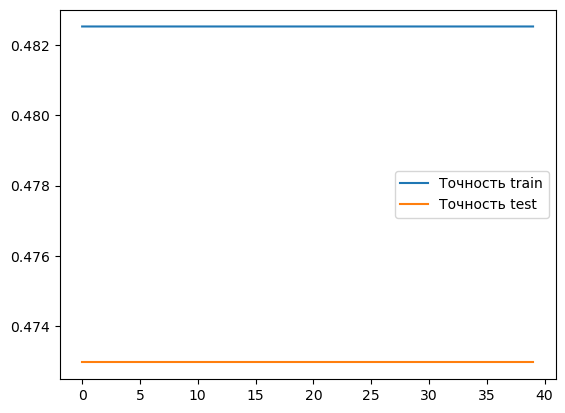

In [31]:
# модель полносвязной нейронной сети
modelNN_Emod = Sequential()
modelNN_Emod.add(Dense(16,  input_dim=11, activation = 'sigmoid'))
modelNN_Emod.add(Dropout(0.5))
modelNN_Emod.add(Dense(32, activation = 'sigmoid'))
modelNN_Emod.add(Dense(1, activation = 'relu'))
modelNN_Emod.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_Emod.summary()
history = modelNN_Emod.fit(X_train_norm,y_train_norm.iloc[:,0], 
                    epochs=40, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('MAE')
plt.legend()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                192       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
19/19 - 1s - loss: 0.3221 - mae: 0.4969 - val_loss: 0.0587 - val_mae: 0.1973 - 753ms/epoch - 40ms/step
Epoch 2/40
19/19 - 0s - loss: 0.0710 - mae: 0.2117 - val_loss: 0.0483 - va

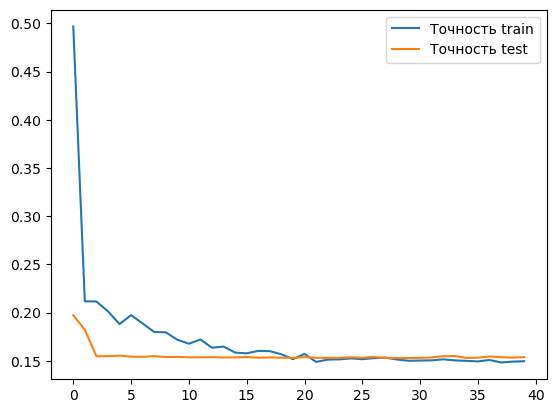

In [32]:
# модель полносвязной нейронной сети
modelNN_Rm = Sequential()
modelNN_Rm.add(Dense(16,  input_dim=11, activation = 'sigmoid'))
modelNN_Rm.add(Dropout(0.5))
modelNN_Rm.add(Dense(32, activation = 'sigmoid'))
modelNN_Rm.add(Dense(1, activation = 'relu'))
modelNN_Rm.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_Rm.summary()
history = modelNN_Rm.fit(X_train_norm,y_train_norm.iloc[:,1], 
                    epochs=40, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('MAE')
plt.legend()

In [33]:
y_pred_Emod = modelNN_Emod.predict(X_test_norm)
y_pred_Rm = modelNN_Rm.predict(X_test_norm)

y_pred = np.hstack((y_pred_Emod,y_pred_Rm))
y_pred = scaler_norm_y.inverse_transform (y_pred)


MAE_NN_Emod = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAE_NN_Rm = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
print (MAE_NN_Emod)
print (MAE_NN_Rm)

R2_NN_Emod = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2_NN_Rm = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (R2_NN_Emod)
print (R2_NN_Rm)

9/9 [==============================] - 0s 1ms/step
7.717132233930303
371.21818320792676
-6.009279729135831
-0.014879737851181352


In [34]:
# записываем данные об ошибках в итоговую таблицу
MAE_Emod.append(['NeuralNetwork',MAE_NN_Emod])
MAE_Rm.append(['NeuralNetwork',MAE_NN_Rm])
R2_Emod.append(['NeuralNetwork',R2_NN_Emod])
R2_Rm.append(['NeuralNetwork',R2_NN_Rm])

### Результаты тестирования моделей

In [35]:
# Результаты - Модуль упругости при растяжении
a = np.array(MAE_Emod)
b = np.array(R2_Emod)

Emod_errors = pd.DataFrame({'Модель регрессии для модуля упругости при растяжении': a[:,0], 'MAE': a[:,1], 'R2': b[:,1]})
Emod_errors

,Модель регрессии для модуля упругости при растяжении,MAE,R2
0,Linear,2.6109355505901184,-0.024476898005094228
1,Ridge,2.5998224772212875,-0.017619777856030527
2,Lasso,2.5948108078737024,-0.018703787461314736
3,ElasticNet,2.5801929025662833,-0.00887867080603466
4,GradientBoosting,2.7049039964607657,-0.12545856440352332
5,KNeighbors,2.6225621597024773,-0.04185458098976058
6,DecisionTree,2.6543059810759577,-0.08523100325701027
7,RandomForest,2.58313981375893,-0.017893036221034553
8,AdaBoost,2.6238658388961555,-0.04670735391856207
9,NeuralNetwork,7.717132233930303,-6.009279729135831


In [36]:
# Результаты - Прочность при растяжении
c = np.array(MAE_Rm)
d = np.array(R2_Rm)

Rm_errors = pd.DataFrame({'Модель регрессии для прочности при растяжении': c[:,0], 'MAE': c[:,1], 'R2': d[:,1]})
Rm_errors

,Модель регрессии для прочности при растяжении,MAE,R2
0,Linear,372.05238450611114,-0.003529768950333745
1,Ridge,369.88575849459477,0.00041319486233071245
2,Lasso,368.9355592328838,0.0033815533408245724
3,ElasticNet,368.8669394882762,-5.703200261408803e-05
4,GradientBoosting,368.8669394882762,-0.054775033603555956
5,KNeighbors,400.581653879789,-0.1709249661618053
6,DecisionTree,400.581653879789,-0.1709249661618053
7,RandomForest,369.79592543764466,-0.006087005707580584
8,AdaBoost,380.8444459740513,-0.04951664076137097
9,NeuralNetwork,371.21818320792676,-0.014879737851181352


# ИНС для Соотношения матрица-наполнитель

In [ ]:
# хранение оценок моделей нейронной сети для Соотношения матрица-наполнитель
MAE=[]

In [ ]:
X = df.drop(['Соотношение матрица-наполнитель'], axis=1)
X.head()

In [ ]:
y = df[['Соотношение матрица-наполнитель']]
y.head()

In [ ]:
#разбиение данных на тестовую и тренировочную часть
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [ ]:
# нормализация  данных
scaler_norm = MinMaxScaler()
scaler_norm.fit(X)
X_norm = pd.DataFrame (data = scaler_norm.transform(X), columns=X.columns)
scaler_norm_y = MinMaxScaler()
scaler_norm_y.fit(y)
y_norm = pd.DataFrame (data = scaler_norm_y.transform(y), columns=y.columns)

In [ ]:
#разбиение данных на тестовую и тренировочную часть
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, 
                                                                        test_size=0.3, random_state=42, shuffle=True)


In [ ]:
 X_test_norm

In [ ]:
 X_test

In [ ]:
print(X_train_norm.shape)
print(X_test_norm.shape)
print(y_train_norm.shape)
print(y_test_norm.shape)

In [ ]:
# функция для построения графика обучения
def plot_ANN(history):
    plt.plot(history.history['mae'], label = 'Точность train')
    plt.plot(history.history['val_mae'], label = 'Точность test')
    plt.xlabel = ('Epochs')
    plt.ylabel = ('MAE')
    plt.legend()
    plt.show()

In [ ]:
# модель ИНС 1
ANN_1 = Sequential()
ANN_1.add(Dense(16,  input_dim=12, activation = 'sigmoid'))
ANN_1.add(Dropout(0.5))
ANN_1.add(Dense(32, activation = 'sigmoid'))
ANN_1.add(Dense(1, activation = 'relu'))
ANN_1.compile(optimizer='adam', loss='mse', metrics=['mae'])
ANN_1.summary()
history = ANN_1.fit(X_train_norm,y_train_norm, epochs=50, validation_split=0.1, verbose=2)
plot_ANN(history)

In [ ]:
# модель ИНС 2
ANN_2 = Sequential()
ANN_2.add(Dense(16,  input_dim=12, activation = 'sigmoid'))
ANN_2.add(Dropout(0.5))
ANN_2.add(Dense(32, activation = 'sigmoid'))
ANN_2.add(Dense(1, activation = 'tanh'))
ANN_2.compile(optimizer='adam', loss='mse', metrics=['mae'])
ANN_2.summary()
history = ANN_2.fit(X_train_norm,y_train_norm, epochs=50, validation_split=0.1, verbose=2)
plot_ANN(history)

In [ ]:
# модель ИНС 3
ANN_3 = Sequential([
                Dense(32,  input_dim=12, activation = 'sigmoid'),
                Dropout(0.5),
                Dense(64, activation = 'sigmoid'),
                Dropout(0.5),
                Dense(32, activation = 'sigmoid'),
                Dense(16, activation = 'sigmoid'),
                Dense(1, activation = 'linear')])
ANN_3.compile(optimizer='adam', loss='mse', metrics=['mae'])
ANN_3.summary()
history = ANN_3.fit(X_train_norm,y_train_norm, epochs=50, validation_split=0.1, verbose=2)
plot_ANN(history)

In [ ]:
# модель ИНС 4
ANN_4 = Sequential()
ANN_4.add(Dense(16,  input_dim=12, activation = 'sigmoid'))
ANN_4.add(Dropout(0.5))
ANN_4.add(Dense(32, activation = 'sigmoid'))
ANN_4.add(Dropout(0.5))
ANN_4.add(Dense(16, activation = 'sigmoid'))
ANN_4.add(Dense(1, activation = 'tanh'))
ANN_4.compile(optimizer='adam', loss='mse', metrics=['mae'])
ANN_4.summary()
history = ANN_4.fit(X_train_norm,y_train_norm, epochs=50, validation_split=0.1, verbose=2)
plot_ANN(history)

In [ ]:
# модель ИНС 5
ANN_5 = Sequential()
ANN_5.add(Dense(64,  input_dim=12, activation = 'sigmoid'))
ANN_5.add(Dropout(0.5))
ANN_5.add(Dense(32, activation = 'sigmoid'))
ANN_5.add(Dropout(0.5))
ANN_5.add(Dense(16, activation = 'sigmoid'))
ANN_5.add(Dense(1, activation = 'tanh'))
ANN_5.compile(optimizer='adam', loss='mse', metrics=['mae'])
ANN_5.summary()
history = ANN_5.fit(X_train_norm,y_train_norm, epochs=50, validation_split=0.1, verbose=2)
plot_ANN(history)

In [ ]:
# модель ИНС 6
ANN_6 = Sequential()
ANN_6.add(Dense(128,  input_dim=12, activation = 'sigmoid'))
ANN_6.add(Dropout(0.5))
ANN_6.add(Dense(64, activation = 'sigmoid'))
ANN_6.add(Dropout(0.5))
ANN_6.add(Dense(32, activation = 'sigmoid'))
ANN_6.add(Dropout(0.5))
ANN_6.add(Dense(16, activation = 'sigmoid'))
ANN_6.add(Dense(1, activation = 'tanh'))
ANN_6.compile(optimizer='adam', loss='mse', metrics=['mae'])
ANN_6.summary()
history = ANN_6.fit(X_train_norm,y_train_norm, epochs=50, validation_split=0.1, verbose=2)
plot_ANN(history)

In [ ]:
# модель ИНС 7
ANN_7 = Sequential()
ANN_7.add(Dense(100, input_dim=12, activation='sigmoid'))
ANN_7.add(LeakyReLU(alpha=1.0))
ANN_7.add(Dense(50, activation='sigmoid'))
ANN_7.add(LeakyReLU(alpha=1.0))
ANN_7.add(Dense(1, activation='softmax'))
ANN_7.add(Dense(1, activation='linear'))
ANN_7.compile(optimizer='adam', loss='mse', metrics=['mae'])
ANN_7.summary()
history = ANN_7.fit(X_train_norm,y_train_norm, epochs=50, validation_split=0.1, verbose=2)
plot_ANN(history)

In [ ]:
# модель ИНС 8
ANN_8 = Sequential()
ANN_8.add(Dense(100, input_dim=12, activation='sigmoid'))
ANN_8.add(Dropout(0.5))
ANN_8.add(LeakyReLU(alpha=1.0))
ANN_8.add(Dense(50, activation='sigmoid'))
ANN_8.add(LeakyReLU(alpha=1.0))
ANN_8.add(Dense(25, activation='softmax'))
ANN_8.add(Dense(1, activation='linear'))
ANN_8.compile(optimizer='adam', loss='mse', metrics=['mae'])
ANN_8.summary()
history = ANN_8.fit(X_train_norm,y_train_norm, epochs=20, validation_split=0.1, verbose=2)
plot_ANN(history)

In [ ]:
# модель ИНС 9
ANN_9 = Sequential()
ANN_9.add(Dense(16, input_dim=12, activation='sigmoid'))
ANN_9.add(Dropout(0.5))
ANN_9.add(LeakyReLU(alpha=1.0))
ANN_9.add(Dense(8, activation='sigmoid'))
ANN_9.add(Dense(1, activation='linear'))
ANN_9.compile(optimizer='adam', loss='mse', metrics=['mae'])
ANN_9.summary()
history = ANN_9.fit(X_train_norm,y_train_norm, epochs=50, validation_split=0.1, verbose=2)
plot_ANN(history)

In [ ]:
# модель ИНС 10
ANN_10 = Sequential()
ANN_10.add(Dense(16, input_dim=12, activation='sigmoid'))
ANN_10.add(Dropout(0.5))
ANN_10.add(LeakyReLU(alpha=1.0))
ANN_10.add(Dense(8, activation='sigmoid'))
ANN_10.add(Dense(1, activation='linear'))
ANN_10.compile(optimizer='adam', loss='mse', metrics=['mae'])
ANN_10.summary()
history = ANN_10.fit(X_train_norm,y_train_norm, epochs=100, validation_split=0.1, verbose=2)
plot_ANN(history)

In [ ]:
y_pred_1 = ANN_1.predict(X_test_norm)
y_pred_2 = ANN_2.predict(X_test_norm)
y_pred_3 = ANN_3.predict(X_test_norm)
y_pred_4 = ANN_4.predict(X_test_norm)
y_pred_5 = ANN_5.predict(X_test_norm)
y_pred_6 = ANN_6.predict(X_test_norm)
y_pred_7 = ANN_7.predict(X_test_norm)
y_pred_8 = ANN_8.predict(X_test_norm)
y_pred_9 = ANN_9.predict(X_test_norm)
y_pred_10 = ANN_10.predict(X_test_norm)

y_pred1 = scaler_norm_y.inverse_transform (y_pred_1)
y_pred2 = scaler_norm_y.inverse_transform (y_pred_2)
y_pred3 = scaler_norm_y.inverse_transform (y_pred_3)
y_pred4 = scaler_norm_y.inverse_transform (y_pred_4)
y_pred5 = scaler_norm_y.inverse_transform (y_pred_5)
y_pred6 = scaler_norm_y.inverse_transform (y_pred_6)
y_pred7 = scaler_norm_y.inverse_transform (y_pred_7)
y_pred8 = scaler_norm_y.inverse_transform (y_pred_8)
y_pred9 = scaler_norm_y.inverse_transform (y_pred_9)
y_pred10 = scaler_norm_y.inverse_transform (y_pred_10)

MAE_1 = mean_absolute_error(y_test,y_pred1)
print (MAE_1)
MAE_2 = mean_absolute_error(y_test,y_pred2)
print (MAE_2)
MAE_3 = mean_absolute_error(y_test,y_pred3)
print (MAE_3)
MAE_4 = mean_absolute_error(y_test,y_pred4)
print (MAE_4)
MAE_5 = mean_absolute_error(y_test,y_pred5)
print (MAE_5)
MAE_6 = mean_absolute_error(y_test,y_pred6)
print (MAE_6)
MAE_7 = mean_absolute_error(y_test,y_pred7)
print (MAE_7)
MAE_8 = mean_absolute_error(y_test,y_pred8)
print (MAE_8)
MAE_9 = mean_absolute_error(y_test,y_pred9)
print (MAE_9)
MAE_10 = mean_absolute_error(y_test,y_pred10)
print (MAE_10)

In [ ]:
# записываем данные об ошибках в итоговую таблицу
MAE.append(['Нейросеть 1',MAE_1])
MAE.append(['Нейросеть 2',MAE_2])
MAE.append(['Нейросеть 3',MAE_3])
MAE.append(['Нейросеть 4',MAE_4])
MAE.append(['Нейросеть 5',MAE_5])
MAE.append(['Нейросеть 6',MAE_6])
MAE.append(['Нейросеть 7',MAE_7])
MAE.append(['Нейросеть 8',MAE_8])
MAE.append(['Нейросеть 9',MAE_9])
MAE.append(['Нейросеть 10',MAE_10])

In [ ]:
# Результаты расчета ошибок нейросетей при предсказании целевого признака "Соотношение матрица-наполнитель"
MAE

In [ ]:
#  результаты MAE
a = np.array(MAE)

MAE_errors = pd.DataFrame({'Версия нейросети': a[:,0], 'MAE Соотношение матрица-наполнитель': a[:,1]})
MAE_errors = MAE_errors.astype({'MAE Соотношение матрица-наполнитель': np.float16})
MAE_errors

In [ ]:
# Гистограмма ошибки
plt.figure(figsize=(15, 10))
plt.barh(MAE_errors['Версия нейросети'], MAE_errors['MAE Соотношение матрица-наполнитель'])
plt.show()

In [ ]:
# Запишем результаты сравнения в файл
MAE_errors.to_excel('./Datasets/MAE_errors.xlsx')
R2_errors.to_excel('./Datasets/R2_errors.xlsx')

In [ ]:
model_y5.save('mn_model_nn')

In [ ]:
# НС на исходных очищенных данных (не нормализованных) 
model= Sequential()
model.add(Dense(100, input_dim=12, activation='sigmoid'))
model.add(LeakyReLU(alpha=1.0))
model.add(Dense(50, activation='sigmoid'))
model.add(LeakyReLU(alpha=1.0))
model.add(Dense(1, activation='softmax'))

#IMPORTANT PART
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()
history = model.fit(X_train,y_train, 
                    epochs=250, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('mae')
plt.legend()
plt.show()

In [ ]:
y_pr = model.predict(X_test)
MAE = mean_absolute_error(y_test,y_pr)
print (MAE)

In [ ]:
model.save('mn_model_nn1')

In [ ]:
y_pr8 = model_y8.predict(X_test)
MAE = mean_absolute_error(y_test,y_pr8)
print (MAE)

In [ ]:
model_y8.save('mn_model_nn8')

# Сохранение модели

In [ ]:
!pip freeze > ../requirements.txt